In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from torchvision.models import resnet18
import json
import os
os.chdir('/home/raid/Desktop/Shubh/DLProject/experiments')

from helpers.train_all_2 import TrainerAll2


from helpers.trainer import Trainer
from helpers.train_all import TrainerAll

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
def whitening_transform(data):
    # Center the data (subtract mean)
    mean = torch.mean(data, dim=0, keepdim=True)
    centered_data = data - mean

    # Compute covariance matrix
    covariance_matrix = torch.matmul(centered_data.T, centered_data) / (centered_data.size(0) - 1)

    # Compute eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = torch.eig(covariance_matrix, eigenvectors=True)

    # Whitening transformation
    whitened_data = torch.matmul(torch.matmul(eigenvectors, torch.diag(1 / torch.sqrt(eigenvalues[:, 0]))), eigenvectors.T) @ centered_data.T
    
    return whitened_data.T

In [4]:
# Defining batch size as given on page 7 on Adam Research Paper
batch_size = 128    

# Calculate the number of workers to use for DataLoader
num_workers = 8

# transformations
transform = transforms.Compose([transforms.ToTensor()])

In [5]:
os.chdir('/home/raid/Desktop/Shubh/DLProject/experiments/models')

# Load CIFAR-10 dataset
trainset = datasets.ImageFolder(root='/home/raid/Desktop/Shubh/DLProject/datasets/ImageNet/tiny-imagenet-200/train', transform=transform)
testset = datasets.ImageFolder(root='/home/raid/Desktop/Shubh/DLProject/datasets/ImageNet/tiny-imagenet-200/test', transform=transform)

# trainset = whitening_transform(trainset)
# testset = whitening_transform(testset)

# Create DataLoader
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

In [6]:
class ResNet(nn.Module):
    
    def __init__(self):
        super(ResNet, self).__init__()
        self.resnet = resnet18(pretrained=False)
        self.resnet.fc = nn.Linear(512, 200)  # Change output size to match CIFAR-10 classes

    def forward(self, x):
        x = self.resnet(x)
        return x

In [7]:
criterion = nn.CrossEntropyLoss()
epochs = 200

optimizer = optim.Adam

In [8]:
model = ResNet().to(device)
trainer = TrainerAll2(train_loader, test_loader, criterion, epochs=50, threshold=5)

head1, head2, head3 = 'EPOCHS', 'TRAIN LOSS', 'VAL LOSS'
print(f'{head1 :>6} {head2 :>25} {head3 :>25}')

log = trainer.train_all_optim(model)

/home/raid/miniconda3/envs/dl/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/raid/miniconda3/envs/dl/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


EPOCHS                TRAIN LOSS                  VAL LOSS
Optimizer : Adam_torch
Epoch:  1


/home/raid/miniconda3/envs/dl/lib/python3.12/site-packages/torch/autograd/__init__.py:266: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at ../torch/csrc/autograd/engine.cpp:1177.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch:  2
Epoch:  3
Epoch:  4
var loss:  243554.93301372437
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
var loss:  172182.60055977484
Epoch:  9
Epoch:  10
    10        0.2659556214957286        16.361497456514382
Epoch:  11
Epoch:  12
var loss:  4222.695825088867
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
var loss:  142.95313863795207
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
var loss:  66.92932563496151
    20       0.10543202366584631        22.983055404469937
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
var loss:  24.30306789748406
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
var loss:  8.837334272283902
Epoch:  29
Epoch:  30
    30       0.06746122611524619        23.336801891085468
Epoch:  31
Epoch:  32
var loss:  5.452191592481028
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
var loss:  6.1634088803694125
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
var loss:  10.696806654707173
    40      0.054871753994923306         23.55809216559688
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
var 

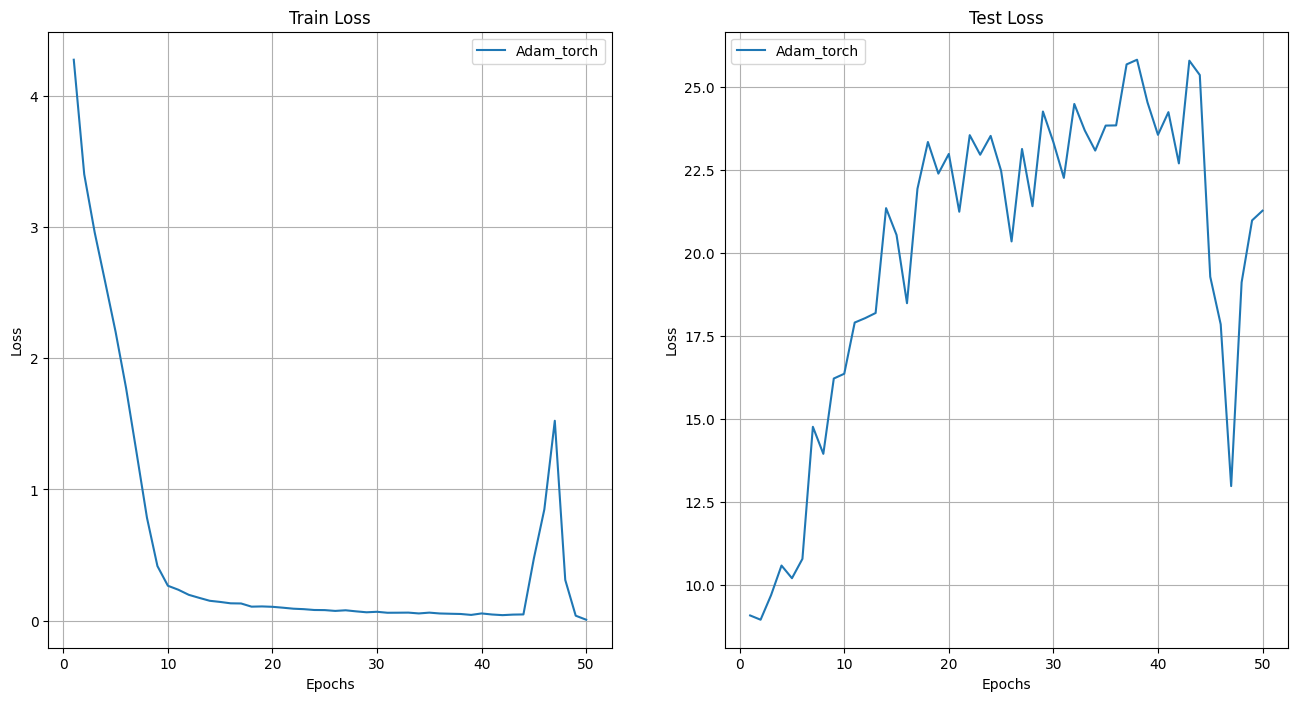

In [9]:
trainer.plot_loss_graphs()

In [10]:
# import json

# with open('../results/logs/CIFAR_CNN.json', 'w', encoding ='utf8') as file: 
#     json.dump(log, file, ensure_ascii = False, indent=4) 

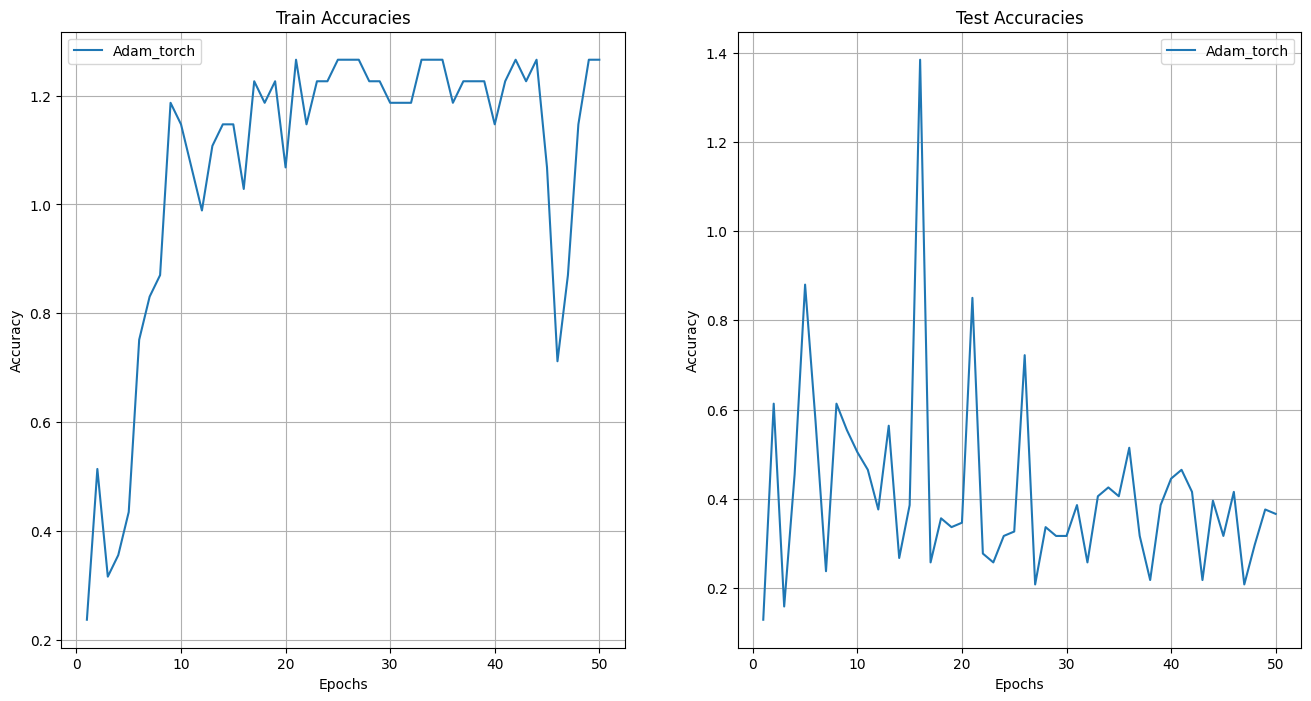

In [11]:
trainer.plot_acc_graphs()